Title : Haberman's Survival Data Set


Data set description:The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Number of Data pounts: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute): 
    1 = the patient survived 5 years or longer; 
    2 = the patient died within 5 year
5. Missing Attribute Values: None

Objective : Perform EDA on Haberman's Survival Data Set to classify whether a patient will survive after 5 years or not based on the given attributes.

# Objective:

 Perform EDA on Haberman's Survival Data Set to classify whether a patient will survive after 5 years or not based on the given attributes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# assigned each column name 
labels = ['age', 'operation_year', 'axil_nodes', 'survived_status']

#Load Dataset
ds = pd.read_csv('haberman.csv', names = labels)
ds

,age,operation_year,axil_nodes,survived_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [2]:
# print shape(datapoints and features) of data set
print(ds.shape)

(306, 4)


In [3]:
# balanced vs imbalanced dataset
ds['survived_status'].value_counts()

1    225
2     81
Name: survived_status, dtype: int64

dataset is imbalanced as difference is too high between points of class

In [4]:
#different properties 
ds.describe()

,age,operation_year,axil_nodes,survived_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
#How many patient surviced after 5 years?
#How many patient dead before 5 years? 

print('Total patient survived >= 5 years: {}%'.format((225/306)*100))
print('Total patient dead <5 years: {}%'.format((81/306)*100))


Total patient survived >= 5 years: 73.52941176470588%
Total patient dead <5 years: 26.47058823529412%


Observation:

1. Shape of the dataset is 306(data points) * 4(class labels) 
2. Dats set is imbalanced 
3. Alomst 74% of total patient survived after 5 years of treatment

# 2-D Scatter Plot

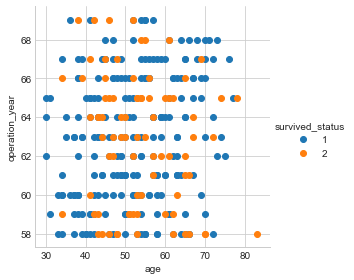

In [6]:
#2-D Scatter plot with age and operation_year
sns.set_style("whitegrid");
sn s.FacetGrid(ds, hue="survived_status", size=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend();
plt.show();

It is observed that, 
1. Patients who are younger than 40 are more likely to survived 
2. data points are overlapping a lot


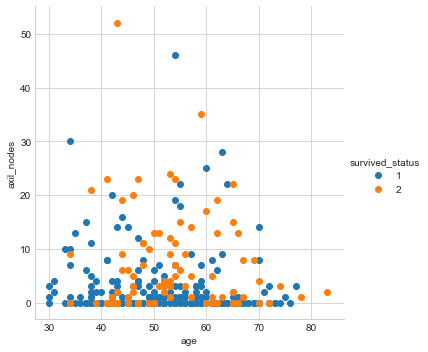

In [7]:
#2-D Scatter plot with age and axill_nodes
sns.set_style("whitegrid");
sns.FacetGrid(ds, hue="survived_status", size=5) \
   .map(plt.scatter, "age", "axil_nodes") \
   .add_legend();
plt.show();

It is observed that, 
1. most of the number of positive axillary nodes detected are less than 10 for 
2. Patient who have positive axillary nodes 0 are likely to survive more.

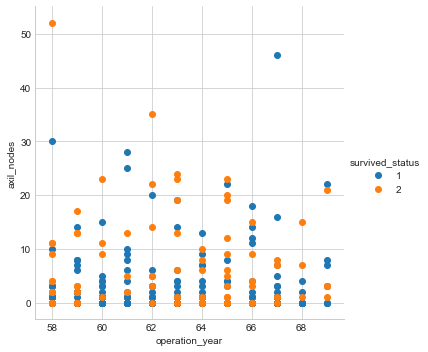

In [8]:
#2-D Scatter plot with operation_year and axill_nodes
sns.set_style("whitegrid");
sns.FacetGrid(ds, hue="survived_status", size=5) \
   .map(plt.scatter, "operation_year", "axil_nodes") \
   .add_legend();
plt.show();

It is observed that, 
1. Patient who have operation in 1965 are likely to survive less.
2. Patient who have operation in 1961 and positive axillary nodes less than 10  are likely to survive more.

# Pair-Plot

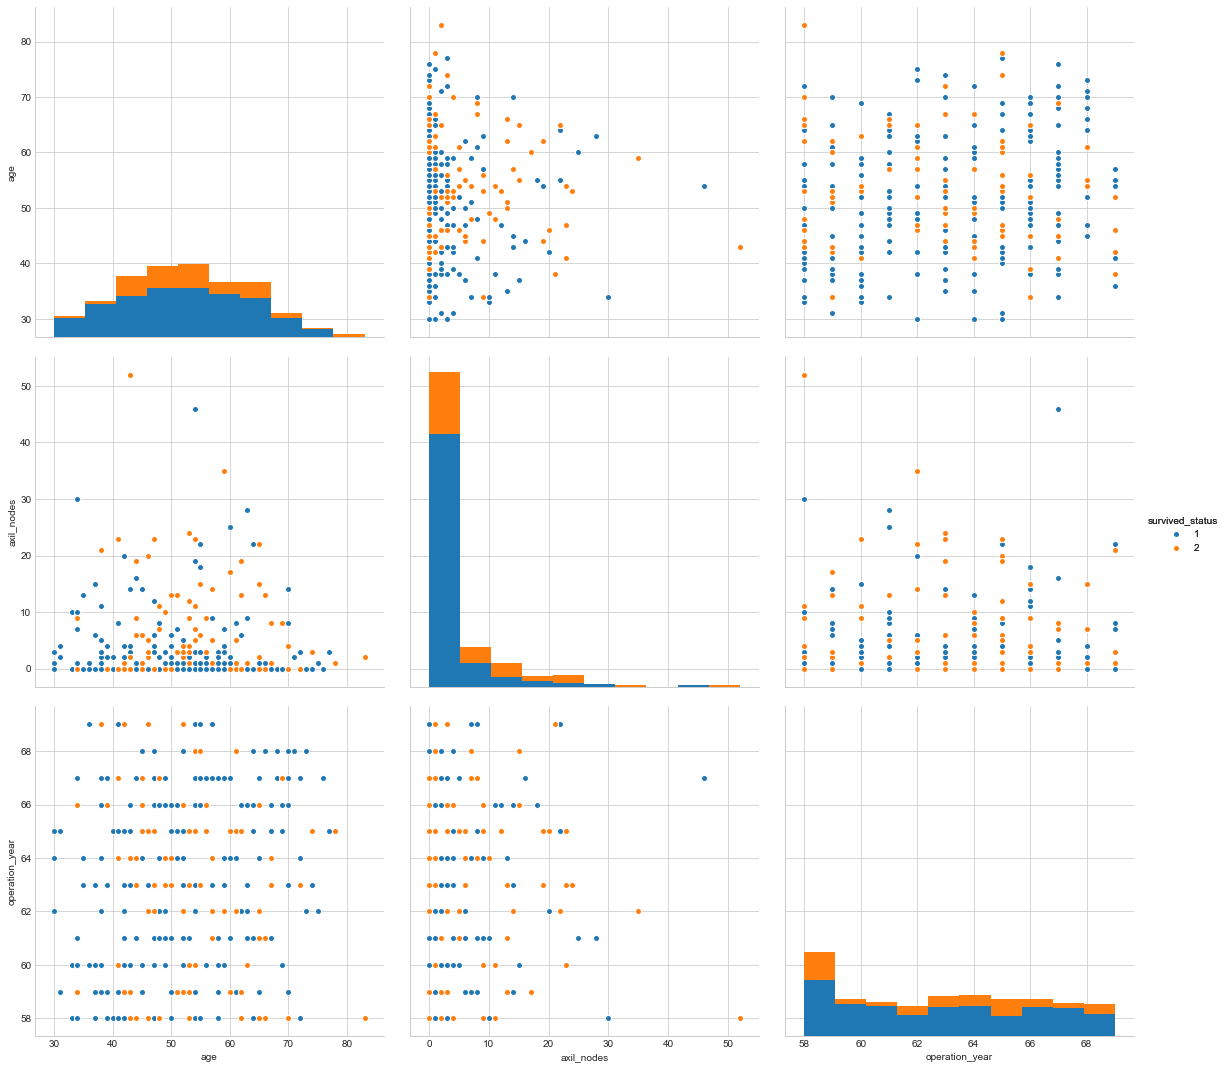

In [10]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(ds, hue ="survived_status", vars =["age","axil_nodes","operation_year"],size=5).add_legend();
plt.show()

Observation is that,
1. Diagonal figures are pdfs 
2. we can see clear classification between points with feature names axil_nodes

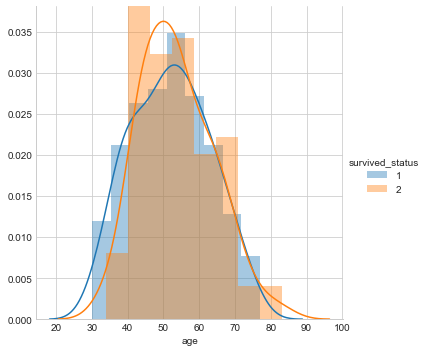

In [47]:
sns.FacetGrid(ds, hue='survived_status', size = 5) \
    .map(sns.distplot,'age')\
    .add_legend();
plt.show();    

Histograms shows how many points we have at given point of a feature.

From Probability density function and Histograms we observed that,

1. Patient who have age less than 40 are mostly survived
2. Patient who have age between 60-70 are likely to die.

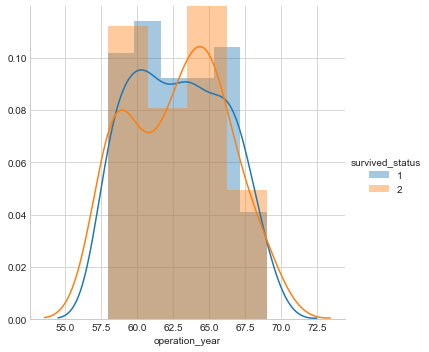

In [48]:
sns.FacetGrid(ds, hue='survived_status', size = 5) \
    .map(sns.distplot,'operation_year')\
    .add_legend();
plt.show();      

It is observed that,

1. patients who have operation near 1965 are more likely to die


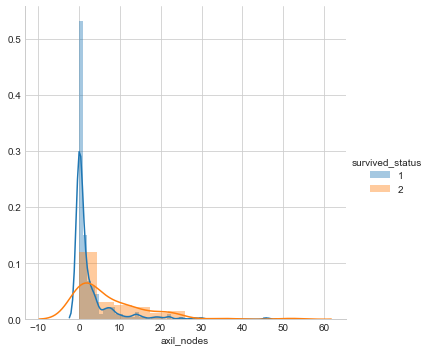

In [49]:
sns.FacetGrid(ds, hue='survived_status', size = 5) \
    .map(sns.distplot,'axil_nodes')\
    .add_legend();
plt.show();   

It is Observed that,
1. patient who have axillary nodes greater than 1 are more likely ro die
2. patient who have 0 axillary nodes are mostly survived.

# CDF

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


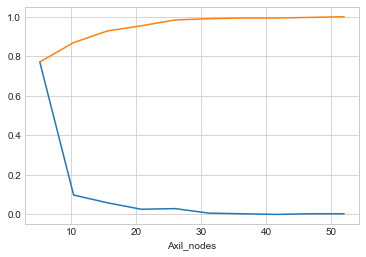

In [50]:
#Plot CDF of axil_nodes

counts, bin_edges = np.histogram(ds['axil_nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_nodes')
plt.show()

# Violin-Plot

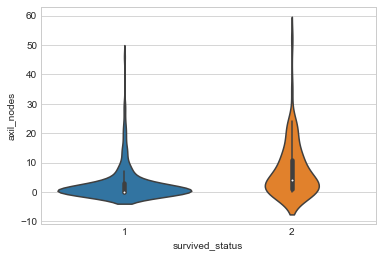

In [51]:
sns.violinplot(x="survived_status", y="axil_nodes", data=ds, size=8)
plt.show()

It is Observed that,
1. patient who have axillary nodes greater than 1 are more likely ro die
2. patient who have 0 axillary nodes are mostly survived.

# Box-Plot

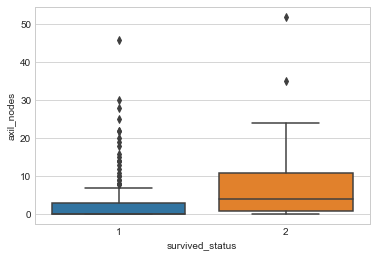

In [52]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
sns.boxplot(x='survived_status',y='axil_nodes', data=ds)
plt.show()

It is Observed that,
1. patient who have axillary nodes greater than 1 are more likely ro die
2. patient who have 0 axillary nodes are mostly survived.

# References



1. https://www.kaggle.com/gilsousa/habermans-survival-data-set
2. https://matplotlib.org/gallery/statistics/hist.html
3. https://www.kaggle.com/ashteotia/eda-on-haberman-survival-dataset
4. https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190
